##### План выполнения  
1. [Запускаем библиотеки](#1)
2. [Исследуем имеющиеся датасеты, проведем предобработку при необходимости](#2)
3. [Проводим исследования и пишем выводы](#3)

### Шаг 1. Запускаем библиотеки<a id="1"></a>

In [2]:
#запускаем первым шагом все предполагаемые билиотеки
import pandas as pd
import matplotlib.pyplot as plt

### Шаг 2. Исследуем имеющиеся датасеты, проведем предобработку при необходимости <a id="2"> </a>

In [3]:
#напечатаем первый датасет
data = pd.read_csv('/content/query_1.csv') 
data

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
#исследуем основные характеристики
data.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [5]:
data.info() #проверим типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [8]:
#напечатаем второй датасет
data2 = pd.read_csv('/content/query_3.csv') 
data2.sample(n = 10, random_state = 1) 

,city,average_flights
94,Челябинск,6.709677
78,Сыктывкар,4.129032
17,Геленджик,2.590909
100,Ярославль,1.322581
36,Кызыл,1.277778
85,Урай,2.000000
55,Новый Уренгой,8.290323
83,Улан-Удэ,1.608696
82,Удачный,3.000000
52,Нижний Новгород,5.870968


In [9]:
data2.info()  #проверим типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
#исследуем основные характеристики
data2.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


###### Наблюдение:  
Типы данных в обоих датасетах указаны корректно и позволяют проводить исследования с ними. Имеются явные аномалии, которые мы рассмотрим далее при помощи графиков.

### Шаг 3. Проводим исследования и пишем выводы<a id="3"> </a>

In [11]:
#выбираем топ 10 городов по кол-ву рейсов в день
top10 = data2.sort_values(by = 'average_flights', ascending = False).head(10)
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


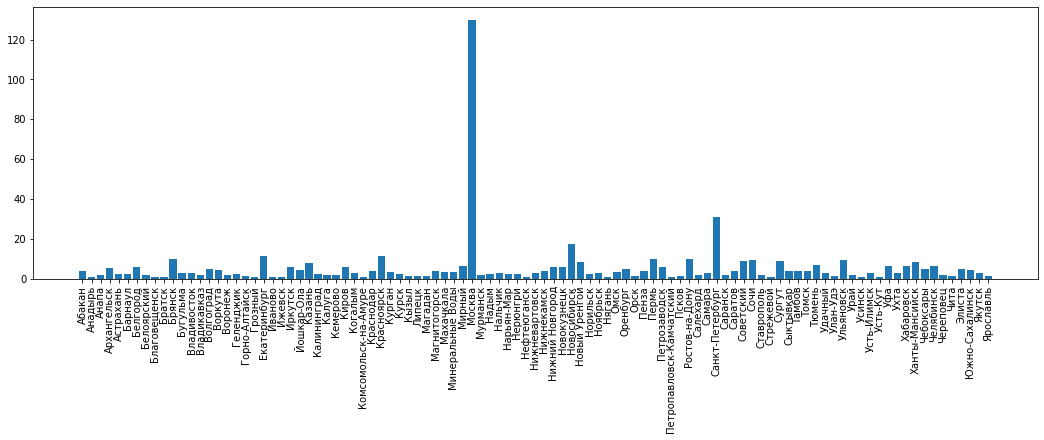

In [13]:
f, ax = plt.subplots(figsize=(18,5))
plot =plt.bar(data2['city'], data2['average_flights'])
x =plt.xticks(rotation='vertical')

###### Вывод:  
Распределение рейсов по городам России в августе 2018 года было неравномерное. Медианным значением для 101 города является всего 3 рейса, при этом в Москву их было в среднем 129,7 в день. Чуть ниже исследуем города с самым большим кол-вом рейсов.

Text(0.5, 0, 'Модель самолета')

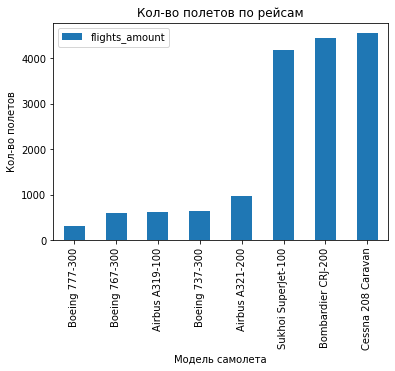

In [14]:
data.sort_values(by = 'flights_amount').plot( kind = 'bar', x = 'model', y = 'flights_amount') #создаем график
plt.title('Кол-во полетов по рейсам') #называем таблицу 
plt.ylabel('Кол-во полетов') #назовем сторону y
plt.xlabel('Модель самолета') #назовем сторону x

###### Вывод:  
Больше всего полетов было на рейсах Bombardier CRJ-200 , Cessna 208 Caravan	4557 и  Sukhoi SuperJet-100. Каждый из них совершил большее кол-во полетов, чем все оставшиеся модели из списка вместе взятые. 

Text(0.5, 0, 'Город')

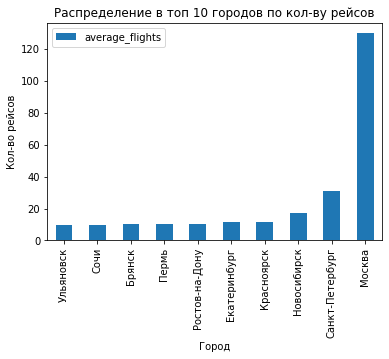

In [15]:
top10.sort_values(by = 'average_flights').plot( kind = 'bar', x = 'city', y = 'average_flights') #создаем график
plt.title('Распределение в топ 10 городов по кол-ву рейсов') #называем таблицу 
plt.ylabel('Кол-во рейсов') #назовем сторону y
plt.xlabel('Город') #назовем сторону x

###### Вывод:  
Внутри ТОП 10 городов по кол-ву рейсов распределение неравномерное. С 4 по 10 места в рейтинге имеют сопоставивые значения, при этом крупные города, как Новосибирск, Санкт-Петербург введу большего кол-ва путеществующих жителей имеют и большее кол-во рейсов. Москва выделяется еще по одной причине - это крупный пересадочный пункт для Российских и междунарожных рейсов.

### Общий вывод.  
    В августе 2018 года в России самыми поппулярными самолетами стали Bombardier CRJ-200 , Cessna 208 Caravan	4557 и  Sukhoi SuperJet-100. На каждом из них было совершено более 4000 рейсов. Оставшиеся модели Airbus и Boeing даже вместе взятые не обеспечили и 3500 тысяч рейсов.  
    Больше всего полетов совершено в Москву. В среднем в день все аэропорты Москвы принимали более 120 рейсов, что обусловлено тем, что данный город - большой транспортно-пересадочный пункт. На втором и третьем месте расположились Санкт-Петебрург и Новосибирск с 31 и 17 рейсами в день соответсвенно, а вот курортный Сочи, не смотря на сезон в августе, показывает такое же кол-во рейсов, как и Брянск и Ульяновск, что является важным атефактом и требует дополнительного исследования.